Kiran Kallada Anandan(20005283)
...
Code:https://colab.research.google.com/drive/1zEjA1rcsRhC3I3QsY--AwTCNovYHO5db?usp=sharing

# HandWritten Digit Recogination

The CNN architecture is designed to effectively learn and classify the features of handwritten digits by using convolutional layers for feature extraction, pooling layers for downsampling, and dense layers for classification. This combination of layers helps the model achieve high accuracy on the MNIST dataset.

Importing Librairies

Firstly, Im importing the MNIST dataset using Keras. This dataset contains 70,000 images of handwritten digits (0-9) and is a standard benchmark for machine learning algorithms. The dataset is split into a training set (60,000 images) and a test set (10,000 images).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
import seaborn as sns

Class distribution in MNIST training set (showing one image per class):
Class 0: 5923 samples
Class 1: 6742 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 4: 5842 samples
Class 5: 5421 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples
Class 9: 5949 samples


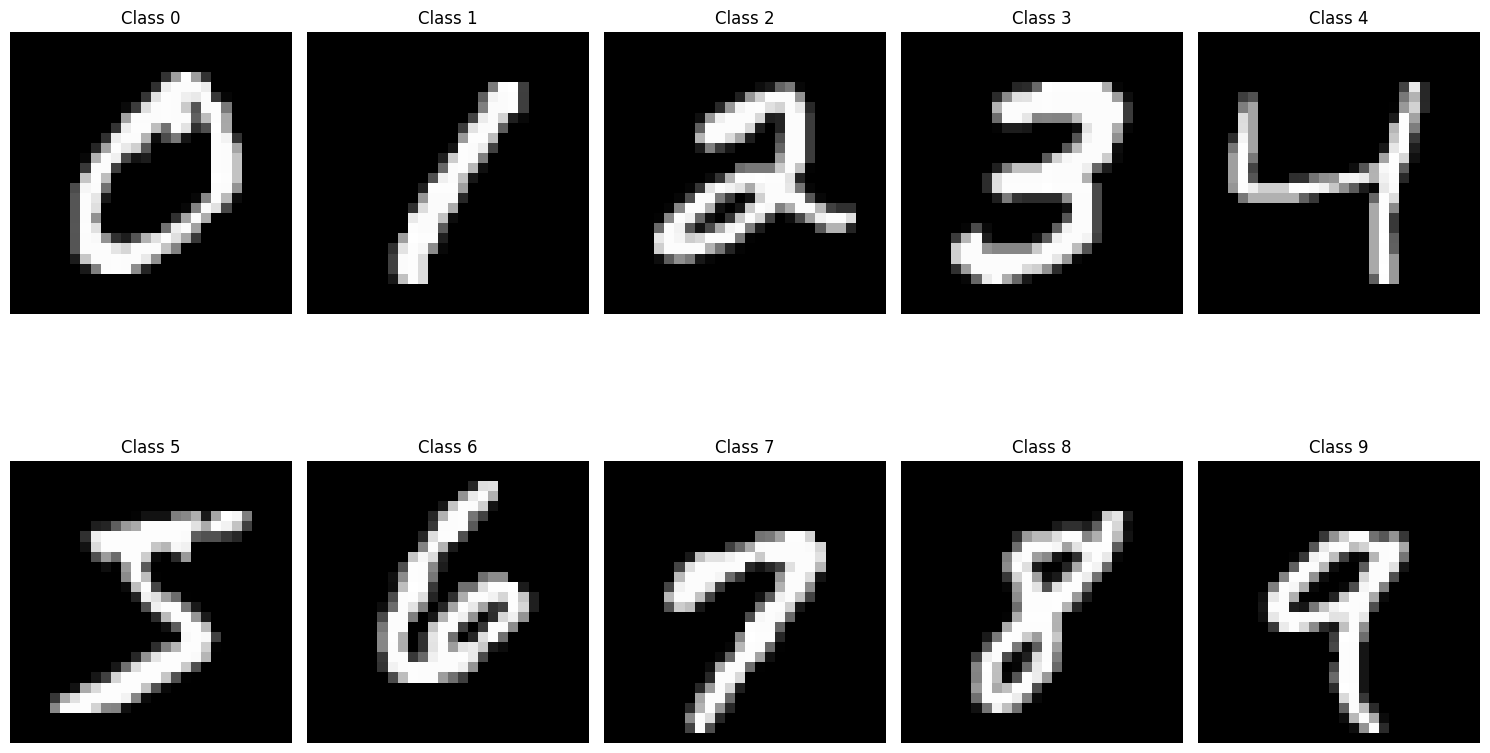

In [ ]:
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Count the number of instances for each class in the training set
unique_train, counts_train = np.unique(train_labels, return_counts=True)
class_distribution_train = dict(zip(unique_train, counts_train))

# Print the class distribution and show one image per class
print("Class distribution in MNIST training set (showing one image per class):")
plt.figure(figsize=(15, 10))
for i in range(10):
    # Find the first occurrence of the class i in the dataset
    index = np.where(train_labels == i)[0][0]
    image = train_images[index]
    label = train_labels[index]

    # Print class count
    print(f"Class {label}: {class_distribution_train[label]} samples")

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Class {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Before feeding the data into the model, I reshape the images to fit the input shape of the neural network and normalize the pixel values to range between 0 and 1. Labels are converted to categorical format, which is suitable for classification tasks.

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(f"Training data shape:{X_train.shape}")
print(f"Testing data shape:{X_test.shape}")

#reshape
X_train=X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize
X_train=X_train/255.0
X_test=X_test/255.0

# Converting labels to one hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# Flattening the image data to SVM
X_train_flat=X_train.reshape(X_train.shape[0],-1)
X_test_flat=X_test.reshape(X_test.shape[0],-1)

# converting one hot encoded labels back to single integers
y_train_labels=np.argmax(y_train,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape:(60000, 28, 28)
Testing data shape:(10000, 28, 28)


Traingn the CNN model

I build a Sequential model with layers suitable for image classification tasks. The layers include convolutional layers (Conv2D) for feature extraction, max pooling layers (MaxPooling2D) for downsampling, a flatten layer to convert the 2D matrix to a 1D vector, and dense layers for classification.

I compile the model with an Adam optimizer, a loss function appropriate for categorical data (categorical crossentropy), and accuracy as a metric. The model is then trained using the training data.

Conv2D Layer: The first layer is a convolutional layer with 32 filters, each of size 3x3. This layer applies a convolution operation to the input image, which helps in extracting features such as edges, textures, and shapes. The activation function used is ReLU (Rectified Linear Unit), which helps in introducing non-linearity to the model.

https://www.google.com/url?sa=i&url=https%3A%2F%2Fsubscription.packtpub.com%2Fbook%2Fdata%2F9781800209718%2F12%2Fch12lvl1sec99%2Farchitecting-a-cnn-for-classification&psig=AOvVaw2OESIQlFpenouQS2WtvqtU&ust=1723113438854000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCJj56P7X4ocDFQAAAAAdAAAAABAE

MaxPooling2D Layer: This layer performs max pooling operation with a pool size of 2x2. Max pooling helps in downsampling the input, reducing the dimensionality and computational complexity, and also helps in making the model invariant to small translations in the input.

Flatten Layer: This layer flattens the 2D matrices into a 1D vector, which is necessary before feeding the data into fully connected (dense) layers.

Dense Layer: A fully connected layer with 64 units is added, with ReLU activation. This layer helps in learning complex representations of the data.

In [ ]:
model=Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 70s - 233ms/step - accuracy: 0.9280 - loss: 0.2530 - val_accuracy: 0.9773 - val_loss: 0.0694
Epoch 2/10
300/300 - 74s - 246ms/step - accuracy: 0.9799 - loss: 0.0647 - val_accuracy: 0.9851 - val_loss: 0.0451
Epoch 3/10
300/300 - 76s - 252ms/step - accuracy: 0.9862 - loss: 0.0449 - val_accuracy: 0.9886 - val_loss: 0.0342
Epoch 4/10
300/300 - 85s - 282ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.9879 - val_loss: 0.0373
Epoch 5/10
300/300 - 86s - 287ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9891 - val_loss: 0.0335
Epoch 6/10
300/300 - 70s - 233ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9905 - val_loss: 0.0282
Epoch 7/10
300/300 - 46s - 152ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9911 - val_loss: 0.0283
Epoch 8/10
300/300 - 80s - 265ms/step - accuracy: 0.9959 - loss: 0.0139 - val_accuracy: 0.9905 - val_loss: 0.0316
Epoch 9/10
300/300 - 81s - 271ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"Test loss of CNN:{loss:.4f}")
print(f"Test accuracy of CNN:{accuracy:.4f}")

Test loss of CNN:0.0291
Test accuracy of CNN:0.9908


PLotting

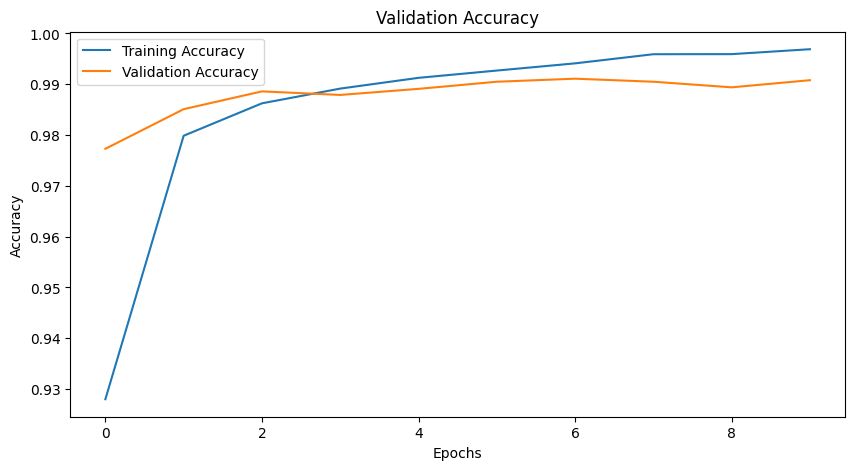

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

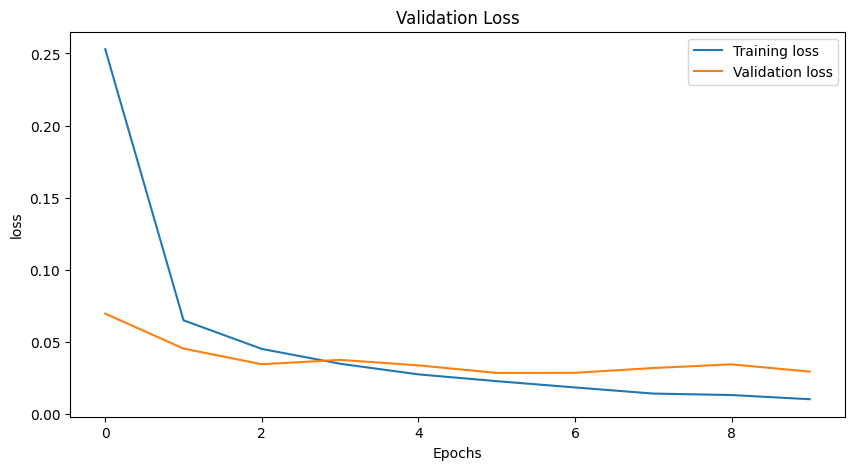

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Evaluating the CNN model

Test loss:0.0291
Test accuracy:0.9908
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


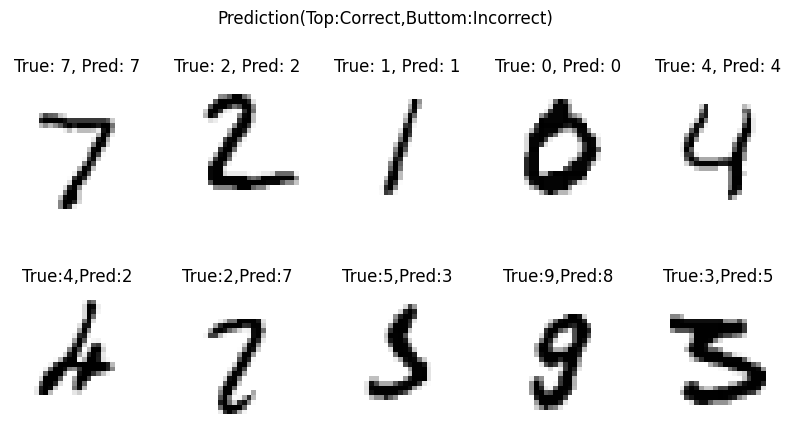

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"Test loss:{loss:.4f}")
print(f"Test accuracy:{accuracy:.4f}")

# Predications
predictions=model.predict(X_test)
predicted_labels=np.argmax(predictions,axis=1)
true_labels=np.argmax(y_test,axis=1)

# Class wise Accuracy
class_accuracies=[]
for i in range(10):
  class_mask=(true_labels==i)
  class_accuracy=np.sum(predicted_labels[class_mask]==true_labels[class_mask])/np.sum(class_mask)
  class_accuracies.append(class_accuracy)

fig,axes=plt.subplots(2,5,figsize=(10,5))
incorrect_indices=np.where(predicted_labels!=true_labels)[0]
correct_indices=np.where(predicted_labels==true_labels)[0]

# Correct PRediction
for i, ax in enumerate(axes[0]):
    index = correct_indices[i]
    ax.set_axis_off()
    ax.imshow(X_test[index].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'True: {true_labels[index]}, Pred: {predicted_labels[index]}')

# Incorrect Prediction
for i, ax in enumerate(axes[1]):
    index=incorrect_indices[i]
    ax.set_axis_off()
    ax.imshow(X_test[index].reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title(f'True:{true_labels[index]},Pred:{predicted_labels[index]}')


plt.suptitle("Prediction(Top:Correct,Buttom:Incorrect)")
plt.show()

Training SVM model

In addition to the neural network, I also use a Support Vector Machine (SVM) for comparison. The SVM is trained using flattened image data.SVM is a supervised learning model used for classification and regression tasks. Here for image classification, SVM aims to find the optimal hyperplane that separates the data points of different classes with the maximum margin

In [ ]:
svm_model=SVC(kernel='linear',C=1.0,random_state=42)
svm_model.fit(X_train_flat,y_train_labels)

svm_predictions=svm_model.predict(X_test_flat)

svm_accuracy=accuracy_score(y_test_labels,svm_predictions)
print(f"SVM Test Accuracy:{svm_accuracy:.4f}")

# Report
print("SVM Classification Rp")
print(classification_report(y_test_labels,svm_predictions))


SVM Test Accuracy:0.9404
SVM Classification Rp
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



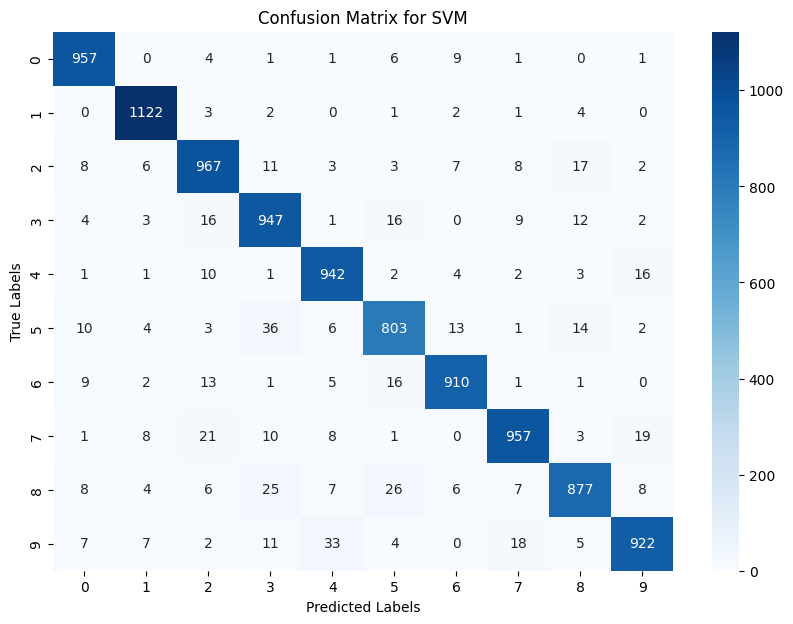

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculateing the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, svm_predictions)

# Ploting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[i for i in range(10)], yticklabels=[i for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()


Multilayer Perceptron (MLP) is a type of feedforward artificial neural network. It consists of multiple layers of nodes, including an input layer, one or more hidden layers, and an output layer. MLPs can model complex non-linear relationships and are suitable for a variety of classification tasks, including image classification.The use of multiple hidden layers allows the model to learn and represent intricate relationships between the input features. By training and evaluating the MLP, one can compare its performance with other classifiers to choose the best model for the specific task.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_flat, y_train_labels)
mlp_predictions = mlp.predict(X_test_flat)
mlp_accuracy = accuracy_score(y_test_labels, mlp_predictions)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")

MLP Test Accuracy: 0.9782


In [ ]:
mlp_accuracy = accuracy_score(y_test_labels, mlp_predictions)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")

print("MLP Classification Report")
print(classification_report(y_test_labels, mlp_predictions))


MLP Test Accuracy: 0.9782
MLP Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



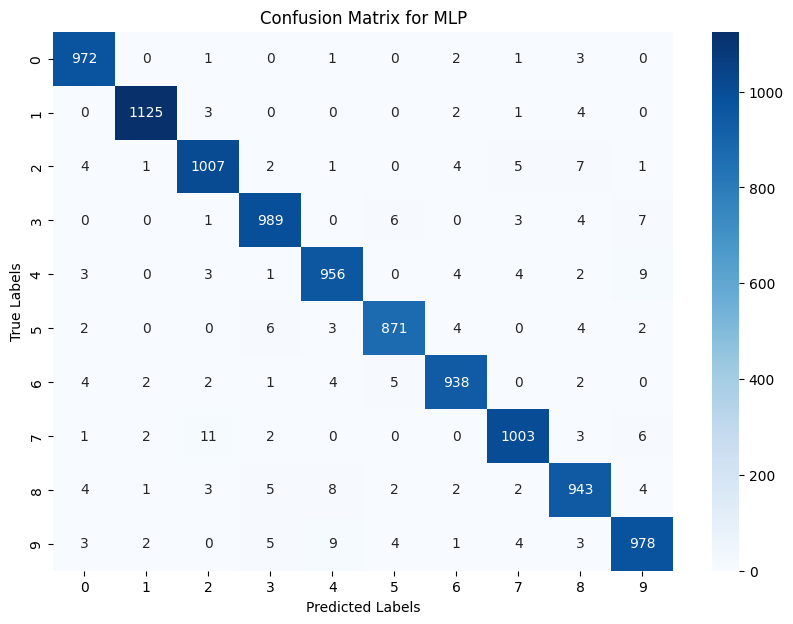

In [ ]:
conf_matrix = confusion_matrix(y_test_labels, mlp_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[i for i in range(10)], yticklabels=[i for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLP')
plt.show()

By using both a CNN and an SVM, I can compare and contrast the effectiveness of these two approaches for image classification. While CNNs are powerful for handling image data due to their ability to capture spatial hierarchies through convolutional layers, SVMs provide a robust alternative that can also achieve good performance, especially when the data is preprocessed effectively. Comparing the results from both models allows me to understand their strengths and limitations in the context of the MNIST dataset.